In [1]:
import tensorflow as tf
import numpy as np
import os
import PIL
import matplotlib.pyplot as plt
import cv2

In [2]:
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [4]:
dataset_dir= tf.keras.utils.get_file(fname="flower_photos", origin=dataset_url, cache_dir = ".", untar=True)

In [5]:
dataset_dir

'.\\datasets\\flower_photos'

In [6]:
import pathlib
dataset_dir = pathlib.Path(dataset_dir)
dataset_dir

WindowsPath('datasets/flower_photos')

In [7]:
list(dataset_dir.glob("*/*.jpg"))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [8]:
image_count = len(list(dataset_dir.glob("*/*.jpg")))
image_count

3670

In [9]:
roses = list(dataset_dir.glob("roses/*.jpg"))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

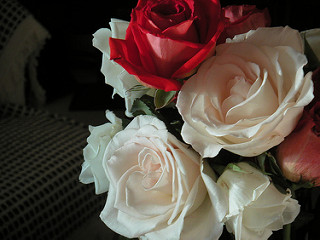

In [10]:
PIL.Image.open(str(roses[1]))

In [11]:
flowers_images_dict = {
    "roses": list(dataset_dir.glob("roses/*.jpg")),
    "daisy": list(dataset_dir.glob("daisy/*.jpg")),
    "dandelion": list(dataset_dir.glob("dandelion/*.jpg")),
    "sunflowers": list(dataset_dir.glob("sunflowers/*.jpg")),
    "tulips": list(dataset_dir.glob("tulips/*.jpg")),
}

In [12]:
flowers_labels_dict = {
    "roses": 0,
    "daisy": 1,
    "dandelion": 2,
    "sunflowers": 3,
    "tulips": 4,
}

In [13]:
flowers_images_dict["roses"][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [14]:
img = cv2.imread(str(flowers_images_dict["roses"][0]))
img.shape

(240, 179, 3)

In [15]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [16]:
x = []
y = []

for flower_name, images in flowers_images_dict.items():
    for i in images:
        img = cv2.imread(str(i))
        resized_img = cv2.resize(img, (180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])


In [17]:
x = np.array(x)
y = np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [19]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [20]:
data_augmentation = Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180, 180,3)),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
    ]
)

In [21]:
num_classes = 5

CNN_model = Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding="same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = "relu"),
    layers.Dense(num_classes)
])

In [23]:
CNN_model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [24]:
CNN_model.fit(x_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 83s 888ms/step - loss: 1.2900 - accuracy: 0.4466
Epoch 2/30
86/86 [==============================] - 75s 874ms/step - loss: 1.0491 - accuracy: 0.5850
Epoch 3/30
86/86 [==============================] - 75s 873ms/step - loss: 0.9185 - accuracy: 0.6548
Epoch 4/30
86/86 [==============================] - 77s 892ms/step - loss: 0.8676 - accuracy: 0.6781
Epoch 5/30
86/86 [==============================] - 77s 899ms/step - loss: 0.8023 - accuracy: 0.6853
Epoch 6/30
86/86 [==============================] - 77s 889ms/step - loss: 0.7465 - accuracy: 0.7133
Epoch 7/30
86/86 [==============================] - 77s 894ms/step - loss: 0.6959 - accuracy: 0.7307
Epoch 8/30
86/86 [==============================] - 74s 866ms/step - loss: 0.6882 - accuracy: 0.7260
Epoch 9/30
86/86 [==============================] - 75s 872ms/step - loss: 0.6535 - accuracy: 0.7467
Epoch 10/30
86/86 [==============================] - 76s 885ms/step - loss: 0.6268 - accura

In [25]:
CNN_model.evaluate(x_test_scaled, y_test)

29/29 [==============================] - 7s 226ms/step - loss: 0.9413 - accuracy: 0.7407


[0.941291093826294, 0.7407407164573669]

In [141]:
y_test[70]

2

In [98]:
flowers_labels_list = ["roses", "daisy", "dandelion", "sunflowers", "tulips"]

In [145]:
def plot_sample(x_test_scaled,y_test,index):
    predictions= CNN_model.predict(x_test_scaled)
    scores = tf.nn.softmax(predictions[index])
    score = np.argmax(scores)
    predicted_name = flowers_labels_list[score]    
    plt.imshow(x[index])
    plt.title(f"predicted name:{predicted_name}")
    plt.axis("off")

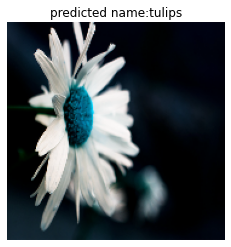

In [158]:
plot_sample(x_test_scaled, y_test,900)

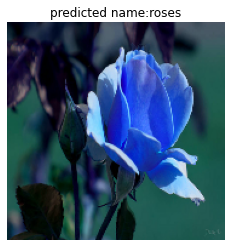

In [154]:
plot_sample(x_test_scaled, y_test, 30)